In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')

In [2]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [3]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [4]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [5]:
print(orders.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [6]:
print(customers.columns)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


In [7]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [8]:
# Drop unnecessary columns
orders = orders[['order_id', 'customer_id', 'order_status']] # Include only necessary columns
order_items = order_items[['order_id', 'order_item_id', 'product_id', 'price', 'freight_value']]
geolocation = geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng' ]]  

In [9]:
# Merge datasets
geo_segment= pd.merge(customers, orders, on="customer_id", how='inner')
geo_segment= geo_segment.merge(order_items, on="order_id", how='inner')
geo_segment= geo_segment.merge(products, on="product_id", how='inner')
geo_segment.shape

(108643, 16)

In [10]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

geo_segment['product_category'] = geo_segment.product_category_name.apply(classify_cat)

In [11]:
geo_segment

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture,8683.0,54.0,64.0,31.0,Furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,Furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,Furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,Rio Grande do Sul,b1a5d5365d330d10485e0203d54ab9e8,delivered,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,office_furniture,8683.0,54.0,64.0,31.0,Furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,Rio de Janeiro,2e604b3614664aa66867856dba7e61b7,delivered,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,office_furniture,8683.0,54.0,64.0,31.0,Furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108638,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,São Paulo,São Paulo,b2f58affcc178fea2daaf834f1acff5e,delivered,1,9682ad2500ae8b2609e6a88eb0cbc5bb,99.90,21.14,home_confort,1500.0,45.0,30.0,45.0,Home & Garden
108639,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,São Paulo,São Paulo,c8203bb57639618630affac9e8e923dd,delivered,1,aea06073397f809424f946979354c9f0,19.99,10.96,pet_shop,300.0,16.0,16.0,16.0,Home & Garden
108640,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,Pará,45b3000bcd10464ac178f32cd783fc83,delivered,1,bbf975bffd2ae9ee52f513ae5c8a4b27,250.00,54.11,health_beauty,2400.0,33.0,10.0,16.0,Beauty & Health
108641,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,São Paulo,São Paulo,49645a8902c1ba980836b7bff991d69f,delivered,1,f6e0a9ce8a6e91c3a0ca2d3005911d20,84.90,7.46,fashion_bags_accessories,300.0,16.0,16.0,11.0,Fashion


In [12]:
# Based on city

In [13]:
# group customers by city
city_segments = geo_segment.groupby('customer_city')

In [14]:
# Aggregate Metrics:
city_metrics = city_segments.agg({
    'customer_unique_id': 'nunique',  # Count the number of unique customers
    'order_id': 'count',  # Count the number of orders
    'price': 'sum',  # Sum of the 'price' column
}).reset_index()

In [15]:
# Rename the columns for clarity
city_metrics.columns = ['city', 'number_of_customers', 'number_of_orders', 'total_price']
city_metrics

,city,number_of_customers,number_of_orders,total_price
0,Eugenio de Castro,1,1,97.00
1,Franca,151,190,21962.66
2,Monte Bonito,1,1,29.50
3,São Bernardo do Campo,867,1023,101011.69
4,São Paulo,14310,17119,1832093.12
...,...,...,...,...
4068,xinguara,9,10,1282.22
4069,xique-xique,3,3,179.79
4070,zacarias,2,2,198.80
4071,ze doca,5,5,688.60


In [16]:
# Calculate additional metrics
city_metrics['avg_order_value'] = city_metrics['total_price'] / city_metrics['number_of_orders']


In [17]:
# Sort the data by number_of_customers in descending order
city_metrics_sorted = city_metrics.sort_values(by='number_of_customers', ascending=False)


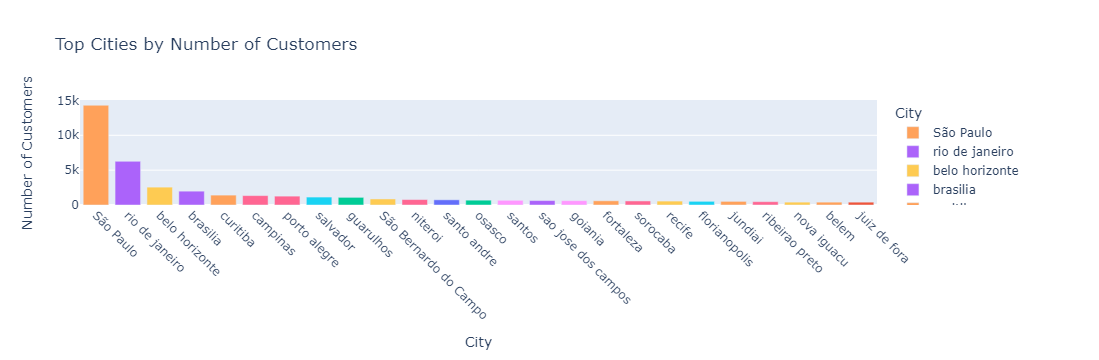

In [44]:
import plotly.express as px
import random

# Assuming city_metrics_sorted is your DataFrame containing city metrics data

# Generate a list of random colors
num_categories = len(city_metrics_sorted[:25])  # Number of categories
random_colors = [random.choice(px.colors.qualitative.Plotly) for _ in range(num_categories)]

fig = px.bar(city_metrics_sorted[:25], x='city', y='number_of_customers', 
             labels={'number_of_customers': 'Number of Customers', 'city': 'City'},
             title='Top Cities by Number of Customers',
             color='city',  # Set the color to the 'city' column
             color_discrete_map=dict(zip(city_metrics_sorted[:25]['city'], random_colors)))  # Assign random colors to each city
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [37]:
# Example segmentation based on average order value
bins = [0, 50, 100, float('inf')]  # Define the bins for segmentation
labels = ['Low Value', 'Medium Value', 'High Value']  # Define labels for each segment

# Create a new column 'customer_segment' in the city_metrics DataFrame
city_metrics['customer_segment'] = pd.cut(city_metrics['avg_order_value'], bins=bins, labels=labels)
city_metrics

,city,number_of_customers,number_of_orders,total_price,avg_order_value,customer_segment
0,Eugenio de Castro,1,1,97.00,97.000000,Medium Value
1,Franca,151,190,21962.66,115.592947,High Value
2,Monte Bonito,1,1,29.50,29.500000,Low Value
3,São Bernardo do Campo,867,1023,101011.69,98.740655,Medium Value
4,São Paulo,14310,17119,1832093.12,107.021036,High Value
...,...,...,...,...,...,...
4068,xinguara,9,10,1282.22,128.222000,High Value
4069,xique-xique,3,3,179.79,59.930000,Medium Value
4070,zacarias,2,2,198.80,99.400000,Medium Value
4071,ze doca,5,5,688.60,137.720000,High Value


In [20]:
# Calculate correlation matrix
correlation_matrix = city_metrics[['number_of_customers', 'number_of_orders', 'total_price']].corr()
correlation_matrix


,number_of_customers,number_of_orders,total_price
number_of_customers,1.000000,0.999953,0.997335
number_of_orders,0.999953,1.000000,0.997172
total_price,0.997335,0.997172,1.000000


In [21]:
# Correlation between 'number_of_customers' and 'number_of_orders':
# Correlation coefficient: 0.999953 (very close to 1)
# Interpretation: There is an extremely high positive correlation (almost perfect correlation) between the number of customers and the number of orders. This suggests that as the number of customers increases, the number of orders also increases, and vice versa.

# Correlation between 'number_of_customers' and 'total_price':
# Correlation coefficient: 0.997335
# Interpretation: There is a very high positive correlation between the number of customers and the total price. This indicates that, in general, as the number of customers increases, the total price of orders also tends to increase.

# Correlation between 'number_of_orders' and 'total_price':
# Correlation coefficient: 0.997172
# Interpretation: There is a very high positive correlation between the number of orders and the total price. This suggests that as the number of orders increases, the total price of those orders also tends to increase.

In [22]:
# Based on state

In [23]:
# group customers by city
state_segments = geo_segment.groupby('customer_state')

In [24]:
# Aggregate Metrics:
state_metrics = state_segments.agg({
    'customer_unique_id': 'nunique',  # Count the number of unique customers
    'order_id': 'count',  # Count the number of orders
    'price': 'sum',  # Sum of the 'price' column
}).reset_index()

In [25]:
# Rename the columns for clarity
state_metrics.columns = ['state', 'number_of_customers', 'number_of_orders', 'total_price']
state_metrics

,state,number_of_customers,number_of_orders,total_price
0,Acre,74,89,15864.07
1,Alagoas,383,423,78280.74
2,Amapá,66,81,13374.81
3,Amazonas,140,161,21614.04
4,Bahia,3120,3625,487660.19
5,Ceará,1244,1409,216663.70
6,Distrito Federal,1990,2323,293919.59
7,Espírito Santo,1912,2207,267029.18
8,Goiás,1850,2225,274306.59
9,Maranhão,693,790,115530.46


In [26]:
# Calculate additional metrics
state_metrics['avg_order_value'] = state_metrics['total_price'] / state_metrics['number_of_orders']


In [27]:
# Sort the data by number_of_customers in descending order
state_metrics_sorted = state_metrics.sort_values(by='number_of_customers', ascending=False)


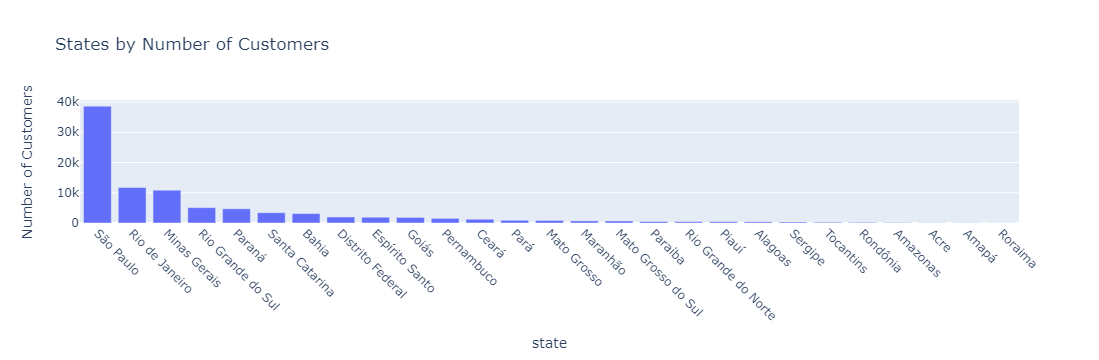

In [28]:
import plotly.express as px

fig = px.bar(state_metrics_sorted[:], x='state', y='number_of_customers', 
             labels={'number_of_customers': 'Number of Customers', 'city': 'State'},
             title='States by Number of Customers')
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()


In [29]:
# Example segmentation based on average order value
bins = [0, 50, 100, float('inf')]  # Define the bins for segmentation
labels = ['Low Value', 'Medium Value', 'High Value']  # Define labels for each segment

# Create a new column 'customer_segment' in the city_metrics DataFrame
state_metrics['customer_segment'] = pd.cut(state_metrics['avg_order_value'], bins=bins, labels=labels)
state_metrics

,state,number_of_customers,number_of_orders,total_price,avg_order_value,customer_segment
0,Acre,74,89,15864.07,178.247978,High Value
1,Alagoas,383,423,78280.74,185.060851,High Value
2,Amapá,66,81,13374.81,165.121111,High Value
3,Amazonas,140,161,21614.04,134.248696,High Value
4,Bahia,3120,3625,487660.19,134.526949,High Value
5,Ceará,1244,1409,216663.70,153.771256,High Value
6,Distrito Federal,1990,2323,293919.59,126.525867,High Value
7,Espírito Santo,1912,2207,267029.18,120.991926,High Value
8,Goiás,1850,2225,274306.59,123.283861,High Value
9,Maranhão,693,790,115530.46,146.241089,High Value


In [30]:
# Calculate correlation matrix
correlation_matrix = state_metrics[['number_of_customers', 'number_of_orders', 'total_price']].corr()
correlation_matrix


,number_of_customers,number_of_orders,total_price
number_of_customers,1.000000,0.999992,0.999023
number_of_orders,0.999992,1.000000,0.998967
total_price,0.999023,0.998967,1.000000
